# Make pvalue plot

## Setup

In [22]:
import numpy as np
import cnvutils
import pandas as pd

In [23]:
# The chromosome the event occurs on
CHROMOSOME = '13'
# The arm the event occurs on
ARM = 'q'
# Options: 'trans' or 'cis'
TRANS_OR_CIS = 'cis'

## Prepare the dataframe

In [24]:
ttest_results_file = f"{CHROMOSOME}{ARM}_{TRANS_OR_CIS}effects_ttest.tsv"

ttest_results = pd.\
read_csv(ttest_results_file, sep="\t").\
rename(columns={"Name": "protein"}).\
set_index("protein")
id_cols = [col for col in ttest_results.columns if not 'Database_ID' in col]
ttest_results = ttest_results[id_cols]
pvalue_cols = [col for col in ttest_results.columns if 'pvalue' in col]
ttest_results = ttest_results[pvalue_cols]

In [25]:
def get_cancer(val):
    val_list = val.split('_')
    return val_list[0].upper()

In [26]:
ttest_results_long = ttest_results.reset_index().melt(id_vars='protein', var_name='cancer').sort_values('protein')
ttest_results_long['cancer'] = ttest_results_long.cancer.apply(get_cancer)

## Append Location Data

In [27]:
locations = cnvutils.get_gene_locations()
locations = locations.droplevel(1)

In [28]:
results = ttest_results_long.set_index('protein')
results = results.join(locations)
results = results.reset_index()

In [29]:
driver_genes = cnvutils.get_driver_genes()
driver_genes = driver_genes.set_index('Gene')
driver_genes.index.rename('Name', inplace=True)
locations = cnvutils.get_gene_locations()
driver_with_loc = driver_genes.reset_index().merge(locations.reset_index())
genes = driver_with_loc[(driver_with_loc.chromosome == CHROMOSOME)].Name.unique()

In [30]:
results = results[results['index'].isin(genes)]

## Make the plots

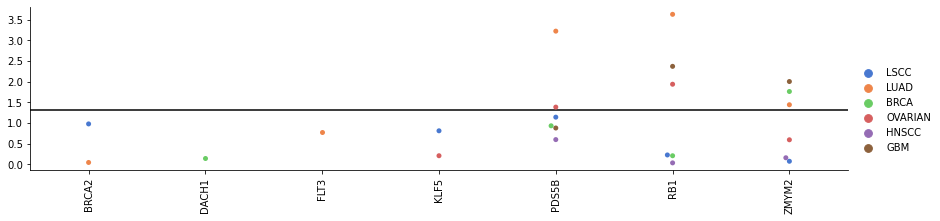

In [31]:
cnvutils.make_pvalue_plot(results, label_column='index', value_column='value', group_column='cancer')